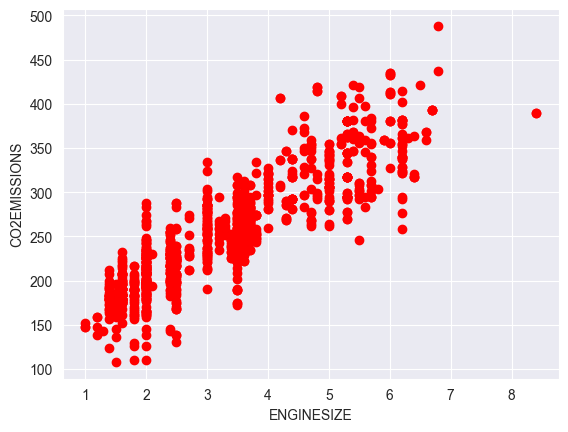

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url)
plt.scatter(x = df.ENGINESIZE, y = df.CO2EMISSIONS, color = 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [14]:
X = df[["ENGINESIZE"]]
y = df[["CO2EMISSIONS"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print ('Coefficients: ', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)

Coefficients:  [39.24838431]
Intercept:  [126.18920155]


Text(0, 0.5, 'Emission')

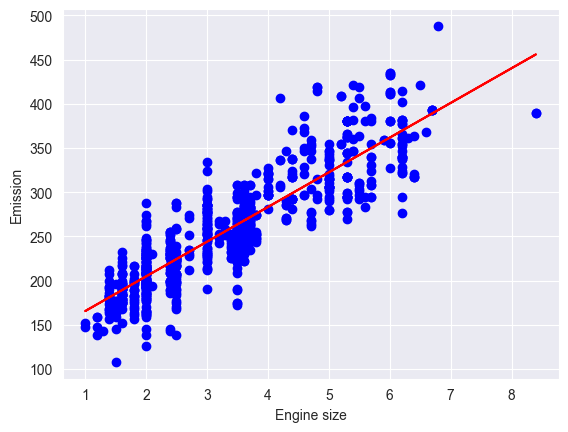

In [15]:
# if we want to see our regression line on the plot.
plt.scatter(X_train, y_train,  color='blue')
# plt.plot(x, y), where x is our training x values X_train, and y = w_{0} + w_{1}x_{1}
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [16]:
# Some evaluation techniques of the model
test_predictions = regressor.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, test_predictions))
print("mean squared error: ", mean_squared_error(y_test, test_predictions))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("r2 score: ", r2_score(y_test, test_predictions))

mean absolute error:  25.56889045602356
mean squared error:  1181.528809303555
root mean squared error:  34.37337355139229
r2 score:  0.7201153918073576


In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
mse_per_fold = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
score = -mse_per_fold
average_error = score.mean()
RMSE = np.sqrt(average_error)
RMSE

np.float64(30.060610980433744)

In [63]:
df_updated = df.drop(columns=['MODELYEAR', 'VEHICLECLASS', 'MODEL', 'MAKE', 'TRANSMISSION', 'FUELTYPE'])
df_updated.corr()
df_updated = df_updated.drop(columns=['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY'])
df_updated

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
...,...,...,...
1062,3.0,24,271
1063,3.2,25,264
1064,3.0,24,271
1065,3.2,25,260


In [64]:
# We can see using multiple linear regression has improved our predictive performance slightly.
X = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB_MPG"]]
y = df[["CO2EMISSIONS"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predications = regressor.predict(X_test)

test_predictions = regressor.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, predications))
print("mean squared error: ", mean_squared_error(y_test, predications))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test, predications)))
print("r2 score: ", r2_score(y_test, predications))

kf = KFold(n_splits = 10, shuffle = True, random_state = 0)
mse_per_fold = cross_val_score(regressor, X_train, y_train, cv = kf, scoring = "neg_mean_squared_error")
score = -mse_per_fold
average_error = score.mean()
RMSE = np.sqrt(average_error)
RMSE

mean absolute error:  14.666807324732213
mean squared error:  468.13474144995257
root mean squared error:  21.63642164152734
r2 score:  0.8891066323052121


np.float64(21.78017300455581)

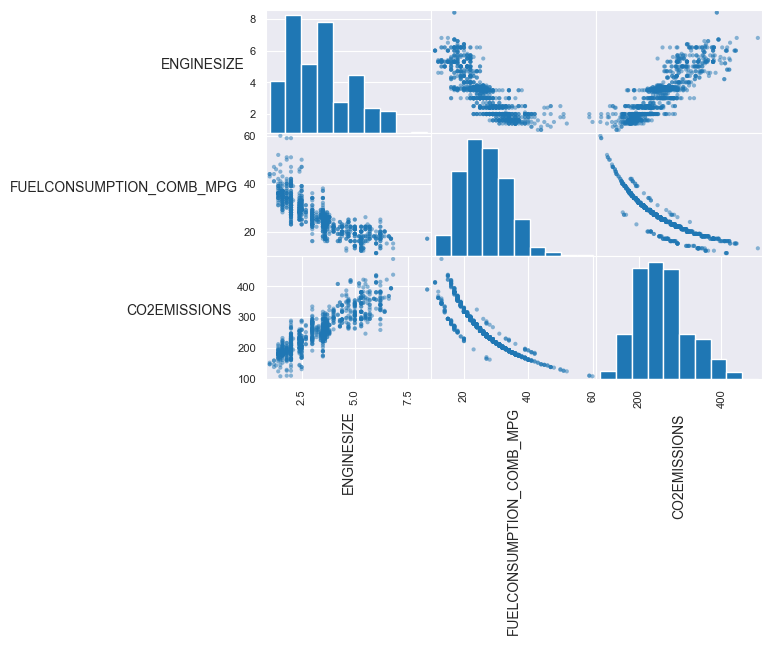

In [86]:
axes = pd.plotting.scatter_matrix(df_updated)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()
